In [1]:
import requests
from bs4 import BeautifulSoup
myBaseUrl = "https://www.amazon.com/Kirimon-Control-Spill-Proof-Style/product-reviews/B086JP5K7H/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber="
# for different product change this base url, should end with page number = 
start_urls = []
for i in range(1, 4): # for different product change second number in range to number of review pages + 1
    start_urls.append(myBaseUrl + str(i))

HEADERS = {
    'authority': 'www.amazon.com',
'method' : 'POST',
'path' : '/gp/redirection/singapore.html',
'scheme' : 'https',
'accept':'*/*',
'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36'
    
}
response = []
for i in start_urls:
    response.append(requests.get(i,headers=HEADERS))

In [2]:
print(response) #response 200 means success

[<Response [200]>, <Response [200]>, <Response [200]>]


In [3]:
#collects soup data
soups = []
for i in response:
    soups.append(BeautifulSoup(i.content))
    
#collects and cleans review data
reviews = []
for soup in soups:
    review = soup.findAll("span",{'class':"a-size-base review-text review-text-content"})
    for i in review:
        reviews.append(i.text)
strippedreviews = []
for review in reviews:
    strippedreviews.append(review.strip())

In [4]:
finalstars = []
for soup in soups:
    star = soup.findAll(attrs = {'data-hook':"review-star-rating"})
    for i in star: 
        finalstars.append(i.text)

In [5]:
#collects and cleans title data 
titles = []
for soup in soups:
    title = soup.findAll("a",{'class':"a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold"})
    for i in title:
        titles.append(i.text)
strippedtitles = []
for title in titles:
    strippedtitles.append(title.strip())

In [6]:
#creates a csv file with title and review data 
import pandas as pd    

df = pd.DataFrame(strippedtitles, columns=["title"])   
df.to_csv('soupkirimon.csv', index=False)  #change name of csv file as needed 
read = pd.read_csv("soupkirimon.csv")
read["review"] = strippedreviews
read.to_csv("soupkirimon.csv", index=False)
read["star"] = finalstars
read.to_csv("soupkirimon.csv", index=False)
df = pd.read_csv("soupkirimon.csv")

In [7]:
#runs sentiment analysis on collected data in csv file
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['review'].apply(pol)
df['subjectivity'] = df['review'].apply(sub)
df

,title,review,star,polarity,subjectivity
0,This cup is a lifesaver.,Excellent produce!My mother (87 yrs old) is in...,5.0 out of 5 stars,0.533333,0.608333
1,"Nice concept, but lacking in function",It works as long as you have a good sized coff...,5.0 out of 5 stars,0.050000,0.535714
2,Safe,Excellent for dementia individuals who have ch...,5.0 out of 5 stars,0.850000,0.800000
3,"Ease of handling, drink from.",Purchased for Alzheimer’s patient with difficu...,4.0 out of 5 stars,0.100000,0.600000
4,Not as advertised,Would love to give this no stars!NOT LEAK PROO...,1.0 out of 5 stars,0.277778,0.611111
5,Great for elderly folks who still want to feed...,This cup really allows my elderly mom to feed ...,5.0 out of 5 stars,0.308333,0.350000
6,Easy to handle,"It is leak proof, thick, and easy to clean.",5.0 out of 5 stars,0.166667,0.669444
7,Works greT,Just what we needed for family member in hospi...,5.0 out of 5 stars,0.000000,0.000000
8,This cup is not worth the money,It is not by no means leak proof in any way. N...,1.0 out of 5 stars,-0.400000,1.000000
9,Leaks,Would not stay sealed,1.0 out of 5 stars,0.000000,0.000000


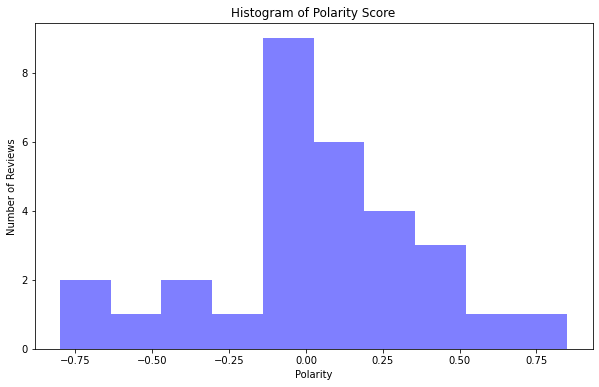

In [8]:
import matplotlib.pyplot as plt
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [9]:
mean1 = df['polarity'].mean()
print("Mean of Polarity: ", mean1)
median1 = df['polarity'].median()
print("Median of Polarity: ", median1)

Mean of Polarity:  0.040583295177045176
Median of Polarity:  0.016666666666666663


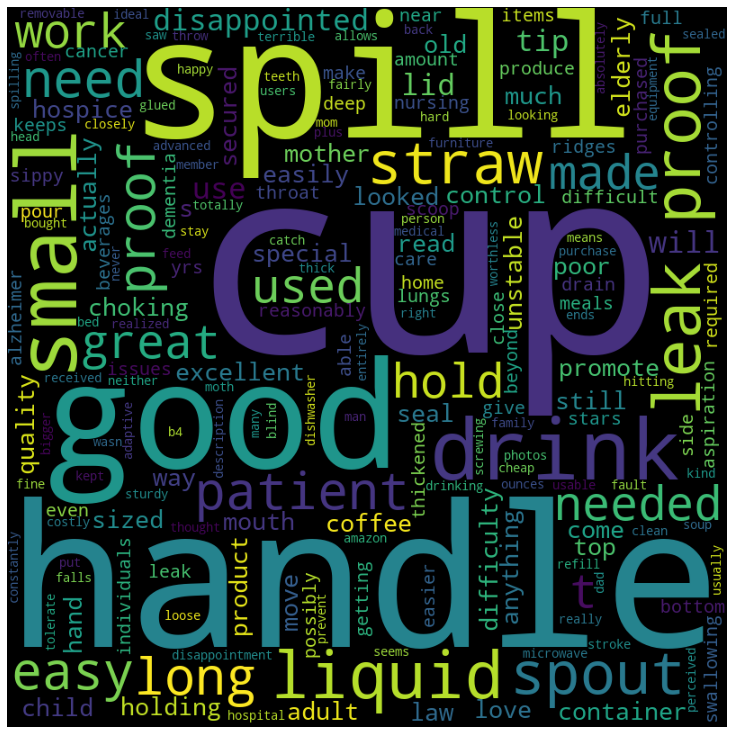

In [10]:

from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)
comment_words = ""
for i in df.review: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

c:\users\jaeme\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

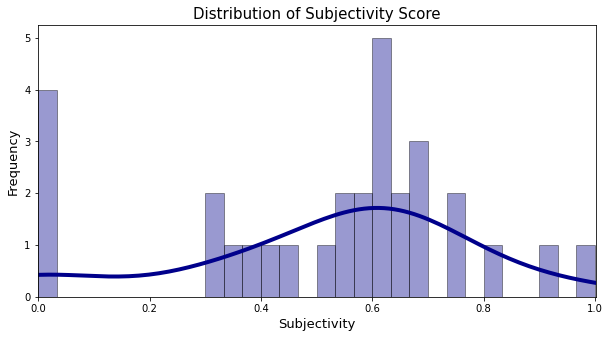

In [11]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)